## Statistical Physics Definitions

The field of statitical physics uses approaches of statistics and probability theory to address physical problems. It considers large populations and derives expressions for the ensemble (or the macrostate) of a system from the microscopic states in the system. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial as fac

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

### Entropy

The term of entropy becomes vey important in that context. It measures the number of different ways a system can be rearranged to yield the same macrostate. It is thus an indicator for the microscopic degeneracy of a macrostate. In this context the definition of entropy by **Boltzmann** is well known, i.e.

\begin{equation}
S=k_B \ln(W)
\end{equation}

where $W$ is the number of microstates corresponding to a systems macrostates. Here $k_B=1.38064852 × 10^{-23} {\rm m^2\, kg\, s^{-2}\, K^{-1}}$ is the Boltzmann constant.



<div class="alert alert-info">
    
**Example: Entropy of an N letter word**


Consider the number of states $W$ of a word with $N$ letters of $M$ different characters. The letter can be arranged in 
    
\begin{equation}
W=M^N
\end{equation}
    
different ways such that the entropy is given by

\begin{equation}
S=N\, k_B \ln(W)=\sum_{1}^{N} \ln(W)
\end{equation}
    
which just tells that entropy is an additive quantity.    
</div>



<div class="alert alert-info">
    
**Example: Arrangement of Molecules along a Chain**

We consider a linear molecules (perhaps a DNA) that has $N$ binding sites for e.g. proteins. $N_p$ sites are occupied with a protein where the binding energy is equal for each site. The number of different ways in which the $N_p$ proteins can be arranged on the $N$ sites is given by the binomial coefficient 
    
\begin{equation}
W(N_p;N)=\frac{N!}{N!(N-N_p)!}
\end{equation}
    
Therefore, the entropy is given by
    
\begin{equation}
S=k_B \ln\left ( \frac{N!}{N!(N-N_p)!}\right )
\end{equation}

which can be further simplified using the *Stirling approximation*:

\begin{equation}
\ln(N!)=\sum_{n=1}^{N}\ln(n)
\end{equation}
    
and

\begin{equation}
\sum_{n=1}^{N}\ln(n)\approx \int_1^{N}\ln(x)dx=N\ln(N)-N
\end{equation}
    
Using the Stirling approximation finally leads to 
    
\begin{equation}
S=-k_B N [c \ln(c)+(1-c)\ln(1-c)]
\end{equation}
    
with $c=N_p/N$ being the mean occupation of each site or the probability to find a state occupied.    
    
    
</div>

**Entropy of Protein Binding on a Chain**

In [58]:
epsilon=1e-3
c=np.linspace(epsilon,1-epsilon,100);N=100
Np=np.arange(1,N)

def S(x):
    return(np.log(fac(N)/(fac(x)*fac(N-x))))


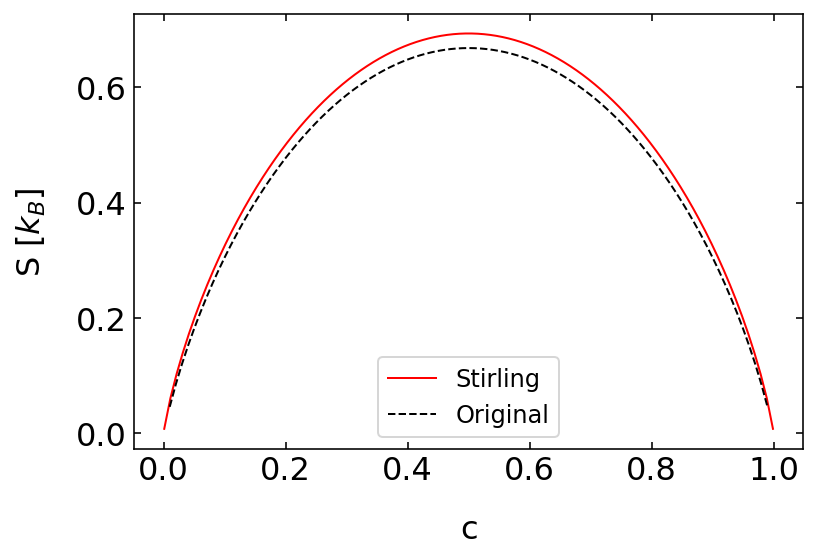

In [57]:
plt.plot(c,-(c*np.log(c)+(1-c)*np.log(1-c)),'r-',label="Stirling")
plt.plot(Np/N,S(Np)/N,'k--',label="Original")
plt.xlabel("c")
plt.ylabel("S [$k_B$]")
plt.legend()
plt.show()

### Boltzmann Distribution and Equipartition

Our previous consideration of the state functions has shown, that thermal equibrium is associated with a minimum in free energy. As the free energy consists of internal energy (or enthalpy) and an entropic term, we may understand this minimization as a competition between the minimization of the internal energy and a maximization of the entropy (since it is $-TS$). The figure below illustrates this competition for a gas in the gravity field. 


<img src="img/entropy_comp.png" alt="entropy" name="entropy" class="bg-primary mb-1" width="500px">


The internal energy minimization yields just a condensed layer at the bottom of the container, while the entropy maximization will try to spread the particles evenly. The compromise of both at finite temperature is given by the **barometric height formula**, i.e.

\begin{equation}
p(z)=p_0\exp\left ( \frac{m g z}{k_B T}\right )
\end{equation}

where $m$ is the mass of a particle and g is the gravitational acceleration. The result actually gives a hint at some very fundamental distribution, which always provides the free energy minimum in thermal equilibirum. This distribution is the Boltzmann distribution.


The Boltzmann distribution is an approach of statistical physics to describe a thermodynamic system in equilibrium. The idea is hereby to deliver probability distributions for the probability of all different microstates. Key distinguishing feature of different microstates is their energy $E_i$ (that was so far neglected in the examples above), where $i$ indicates the $ith$ microstate.

The Boltzmann distribution tells us precisely the probability of finding a given microstate with energy $E_i$: If a particle is in equilibrium with its environment then the probability of finding the particle in state $i$ with energy $E_i$ is:

\begin{equation}
p(E_i)=\frac{1}{Z}\exp\left ( -\frac{E_i}{k_B T}\right )
\end{equation}

The normalization factor $1/Z$ contains the so called partition function $Z$:

\begin{equation}
Z=\sum_{i}\exp\left ( -\frac{E_i}{k_B T}\right )={\rm const}
\end{equation}

It ensures that the total probablity to find a system in any of the states is 

\begin{equation}
\sum_i p(E_i)=1
\end{equation}

The Boltzmann distribution is useful to calculate also expectation values, for example of the total energy of the system (the mean energy $\langle E\rangle$).

The mean is defined by+
\begin{equation}
\langle E \rangle=\frac{1}{Z}\sum_{i=1}^{N}E_{i}\exp\left ( -\frac{E_i}{k_B T}\right)
\end{equation}

Abbrevating $\beta=(k_B T)^1$ we find

\begin{equation}
\langle E \rangle=\frac{1}{Z}\sum_{i=1}^{N}- \frac{\partial }{\partial \beta}\exp\left ( -\beta E_i\right)
\end{equation}

where the sum is nothing else than the derivative of the partitional function

\begin{equation}
\langle E \rangle=-\frac{1}{Z} \frac{\partial }{\partial \beta}Z
\end{equation}

or just

\begin{equation}
\langle E \rangle=-\frac{\partial }{\partial \beta}\ln(Z)
\end{equation}


**Free energy and Boltzmann distribution**

The total free energy of the system can finally be calculated with the help of the partition function 

\begin{equation}
G=-k_B T \ln(Z)
\end{equation}

Note that this is the total energy and not the mean energy (internal, enthalpy or free energy) of the states in the system.


### Chemical Potential and Osmotic Pressure

So far we have considered either isolated systems, meaning that no energy nor particle exchange is possible, and closed systems, which allow an exchange of energy with a reservoir (bath). We will now have a look at a system that also allows an exchange of particles with a reservoir. For these systems, we will define the **chemical potential $\mu$** which we will identify as the **free energy change when adding one molecule of a given species to a thermodynamic system** at constant $p$ and $T$.

We consider a system of two components A and B in contact with a heat bath and a diffusive equilibrium between A and B. The total free energy of our system is then defined as

\begin{equation}
G=G_{\mathrm A}+G_{\mathrm B}.
\end{equation}

The total number of particles in the system is also contained by... In equilibrium we require the free energy of the system to be a minimum with respect to the particle number such that

\begin{equation}\frac{\mathrm dG}{\mathrm dN}=\frac{\mathrm dG_{\mathrm A}}{\mathrm dN_{\mathrm A}}|_{T,p}+\frac{\mathrm dG_{\mathrm B}}{\mathrm dN_{\mathrm B}}|_{T,p}=0.\end{equation}

Since the total number of particles is conserved, we also find in equilibrium that from which follows that

\begin{equation}
\frac{\mathrm dG_{\mathrm A}}{\mathrm dN_{\mathrm A}}=\frac{\mathrm dG_{\mathrm B}}{\mathrm dN_{\mathrm B}}.
\end{equation}

We can now define a new quantity

\begin{equation}
\mu(T,p,N)=\frac{\mathrm dG}{\mathrm dN}|_{T,P}
\end{equation}

which is termed the chemical potential, which is the change in the free energy when adding a particle to the system. The chemical potential may be interpreted as the capacity of a system to change the number of particles. We will have a closer look at the chemical potential with an example now.

**Free energy of a dilute solution**

We would like to calculate the free energy and the chemical potential for a dilute solution of some _solutes_ in a solvent, which we just term H$_2$O. Actually, no additional information on the details of the solute and solvent are currently required, though if we want to have numbers, we would need to know which solute or solvent we are looking at.

The solute chemical potential is defined by

\begin{equation}
\mu_{\rm solute}=\left( \frac{\partial G_{\rm tot}}{\partial N_{\rm s}}\right)|_{p,T}
\end{equation}

or intuitively as

\begin{equation}
\mu_{\rm solute}=G_{\rm tot}(N_{\rm s}+1)-G_{\rm tot}(N_{\rm s}).
\end{equation}

Analyzing the situation, we obtain

\begin{equation}
G_{\rm tot}=N_{\rm{H_{2}O}\varepsilon_{H_{2}O}}+N_{\rm s}\varepsilon_{\rm s}-TS_{\rm mix}.
\end{equation}

In the following, we are interested in the last term, which is the entropic contribution to the free energy containing the entropy of mixing solute and solvent.

The mixing entropy can be calculated by either the Gibbs definition

\begin{equation}
S_{\rm mix}=-k_{\rm B}\sum_{i}p_{i}\ln(p_{i})
\end{equation}

or the Boltzmann definition

\begin{equation}
S_{\rm mix}=k_{\rm B}\ln(W).
\end{equation}

We will use the latter definition including the number of possible configurations to obtain the mixing entropy.

### Gibbs Distribution

In [61]:
np.zeros([3,3,3]).shape

(3, 3, 3)